# Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

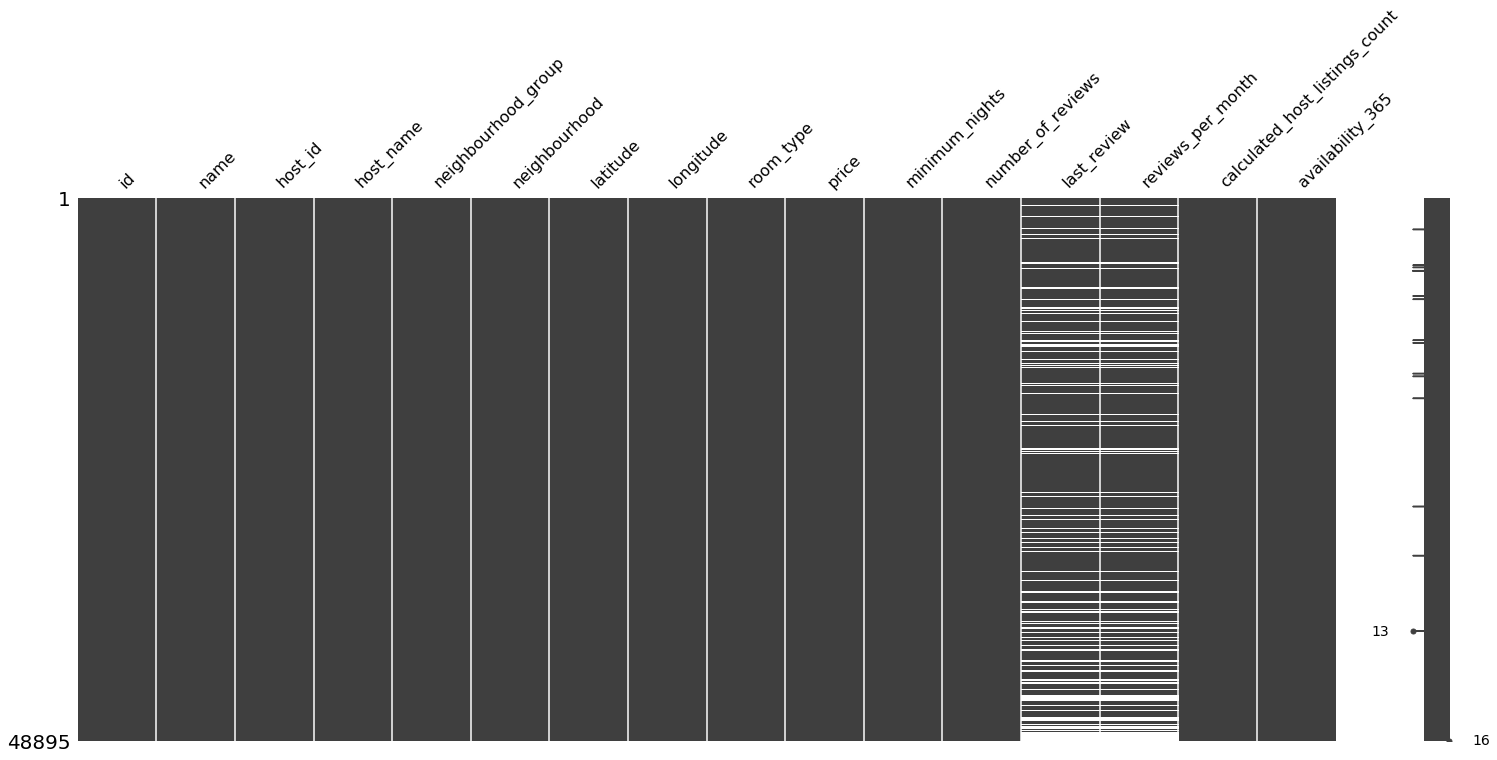

In [5]:
msno.matrix(df)

We can see many NaN values present in the two columns, which is last_review and reviews_per_month. So,lets see how many NaN values are there?

In [6]:
print("The Total Missing values presents in \"last_review\" columns is: {}".format(df['last_review'].isnull().sum()))
print("The Total Missing values presents in \"reviews_per_month\" columns is: {}".format(df['reviews_per_month'].isnull().sum()))

The Total Missing values presents in "last_review" columns is: 10052
The Total Missing values presents in "reviews_per_month" columns is: 10052


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Looks like some of the columns are not relevent for our Dataset so simply we can drop it.

In [8]:
df = df.drop(['id','name','host_name','last_review','reviews_per_month'],axis=1)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Let's Visualise which Area has the highest price.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

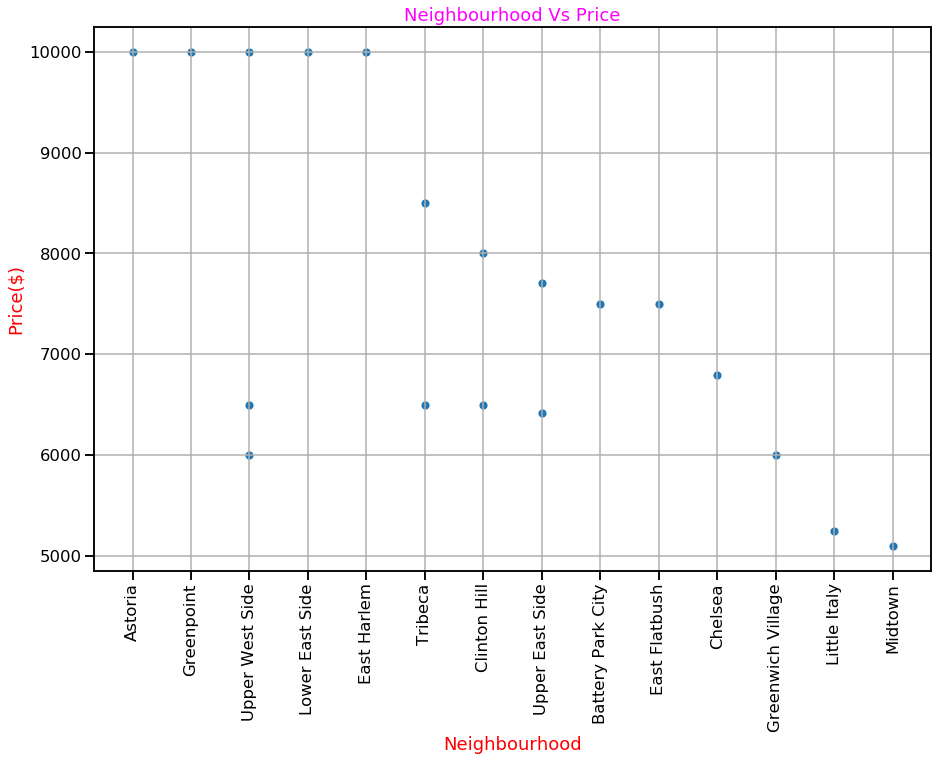

In [9]:
sns.set_context("talk",font_scale=1.0)
sns.scatterplot('neighbourhood','price',data = df.sort_values('price',ascending=False).head(20))
plt.grid()
plt.title("Neighbourhood Vs Price",color='magenta')
plt.xlabel("Neighbourhood",color='r')
plt.ylabel("Price($)",color='r')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

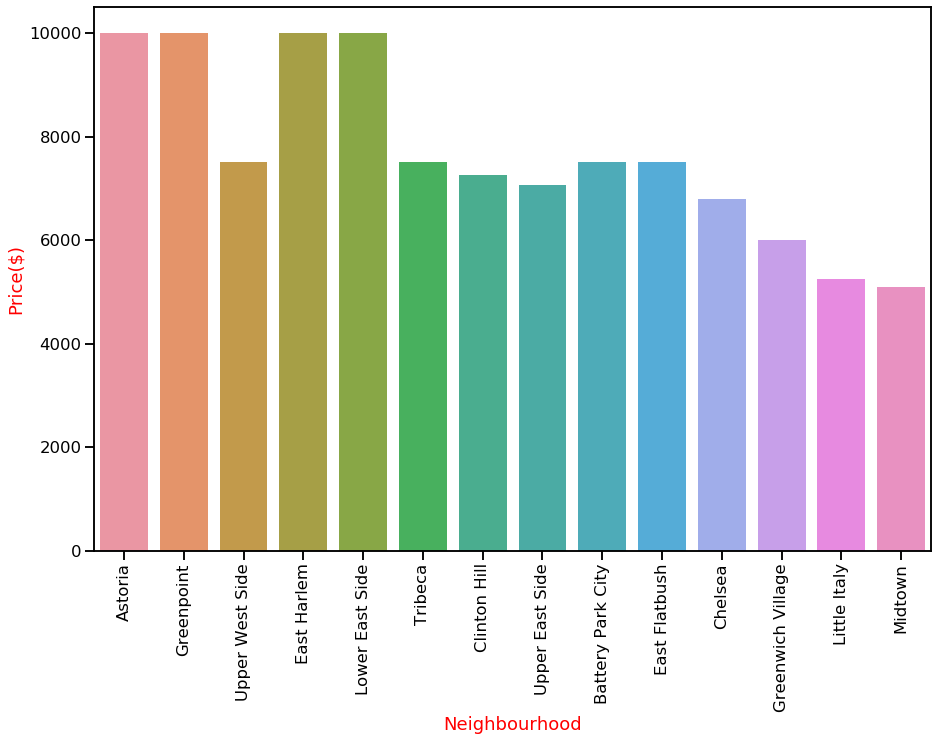

In [10]:
sns.set_context("talk",font_scale=1.0)
ax=sns.barplot('neighbourhood','price',data = df.nlargest(20,'price'),ci=None)
plt.xlabel("Neighbourhood",color='r')
plt.ylabel("Price($)",color='r')
plt.xticks(rotation=90)

In [11]:
host = df['host_id'].value_counts().head(15)
host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643'),
 Text(0, 0, '1475015'),
 Text(0, 0, '120762452'),
 Text(0, 0, '2856748'),
 Text(0, 0, '205031545'),
 Text(0, 0, '190921808')]

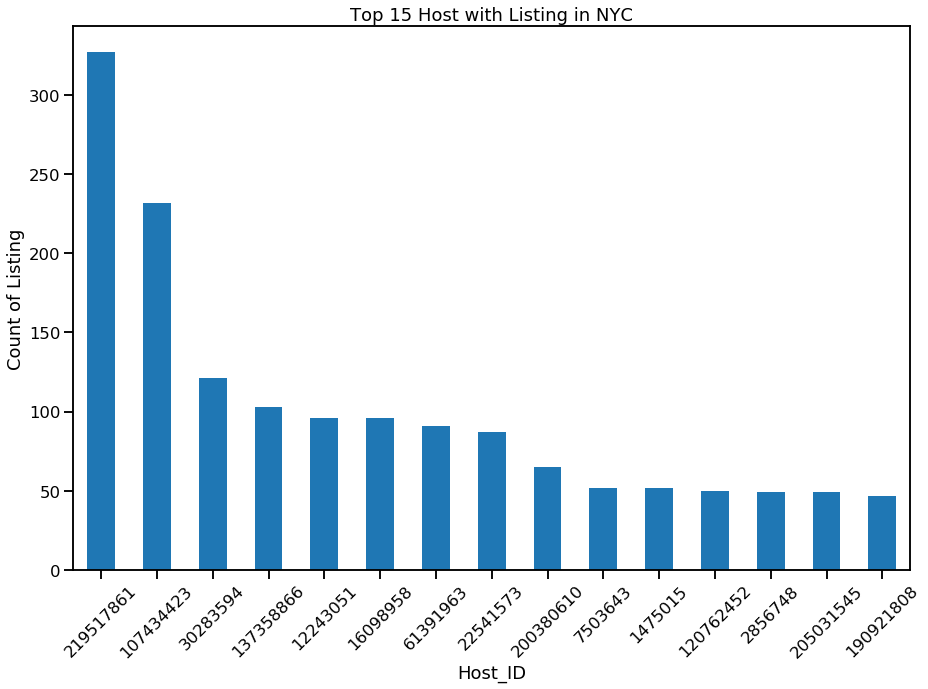

In [12]:
fig_1 = host.plot(kind='bar')
fig_1.set_title("Top 15 Host with Listing in NYC")
fig_1.set_xlabel('Host_ID')
fig_1.set_ylabel('Count of Listing')
fig_1.set_xticklabels(fig_1.get_xticklabels(),rotation=45)



In [13]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

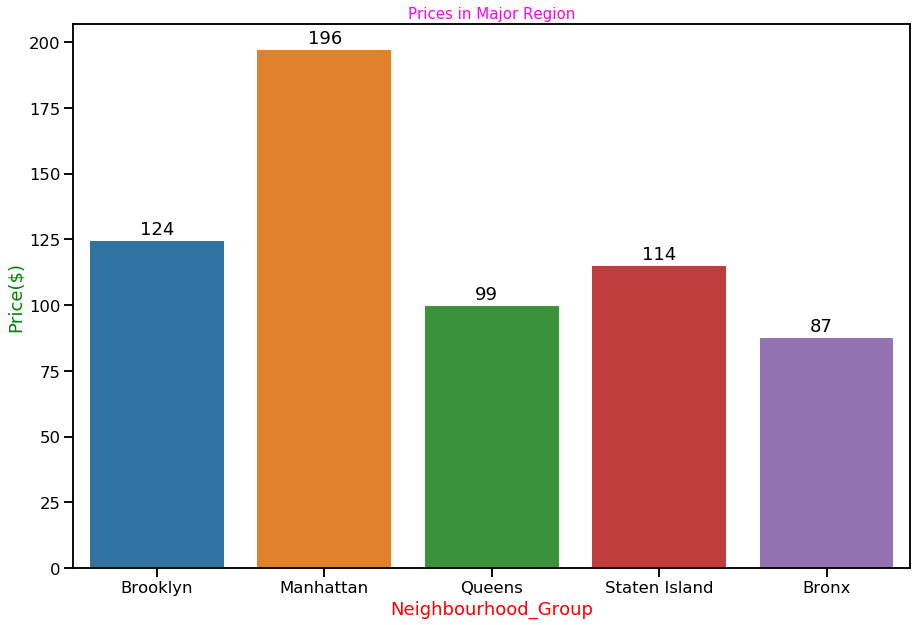

In [14]:
sns.set_context('talk')
ax=sns.barplot(x = df['neighbourhood_group'],y = df['price'],ci=None)
plt.xlabel("Neighbourhood_Group",color='r')
plt.ylabel("Price($)",color='g')
plt.title("Prices in Major Region",color='magenta',size=15)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.30, p.get_height()+1), va='bottom',
                    color= 'black')

From the above graph we can see that Manhattan is very costly compare to others region.

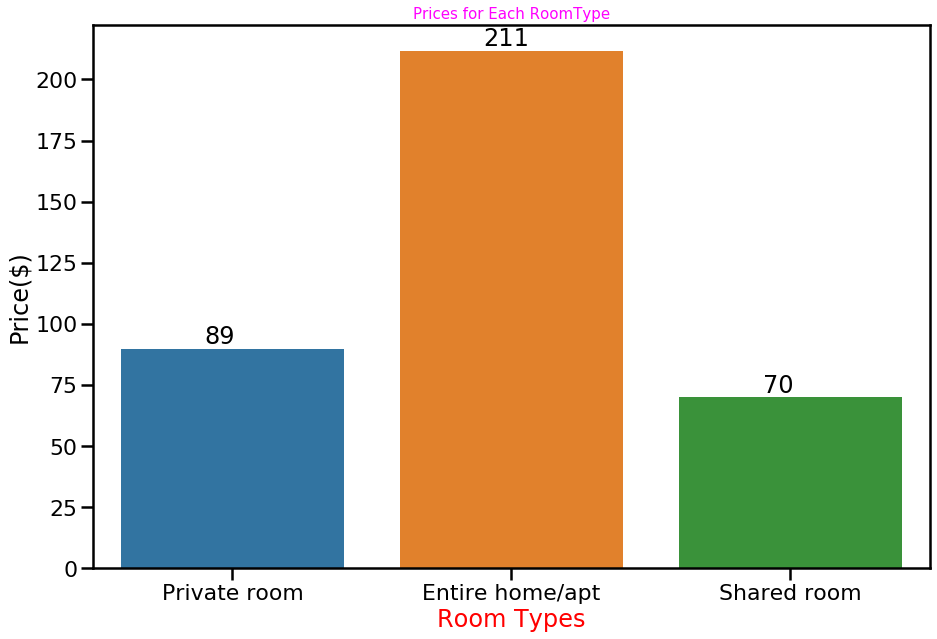

In [15]:
sns.set_context('poster')
ax = sns.barplot(df['room_type'],df['price'],ci=None)
plt.xlabel("Room Types",color='r')
plt.ylabel("Price($)")
plt.title("Prices for Each RoomType",color='magenta',size=15)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.30, p.get_height()-0.05), va='bottom',
                    color= 'black')

Text(0.5, 1.0, 'Room Availability')

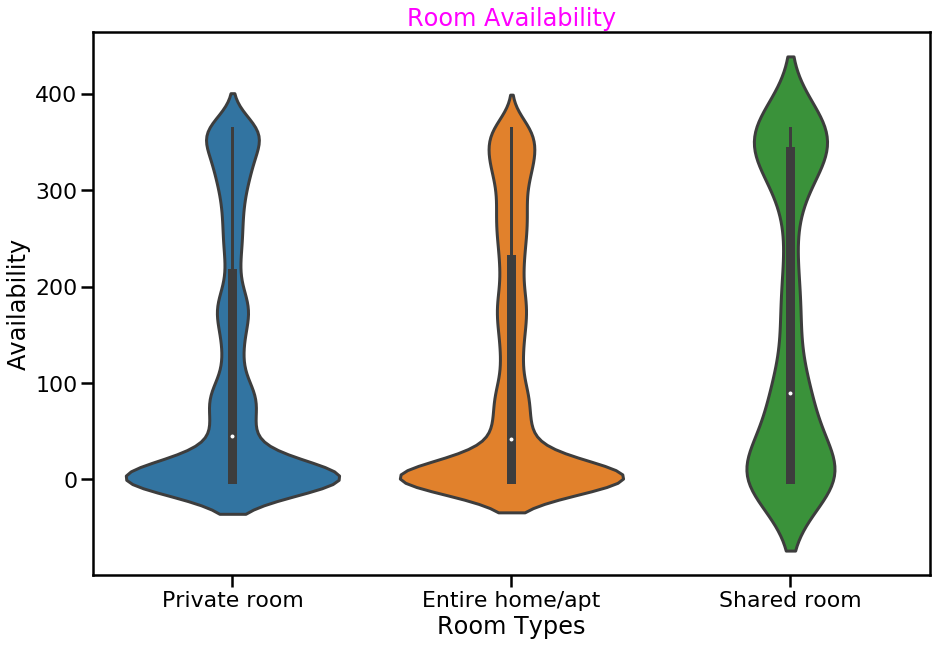

In [16]:
sns.violinplot(df['room_type'],df['availability_365'])
plt.xlabel("Room Types")
plt.ylabel("Availability")
plt.title("Room Availability",color = 'magenta')

Text(0.5, 1.0, 'Availability in each Region')

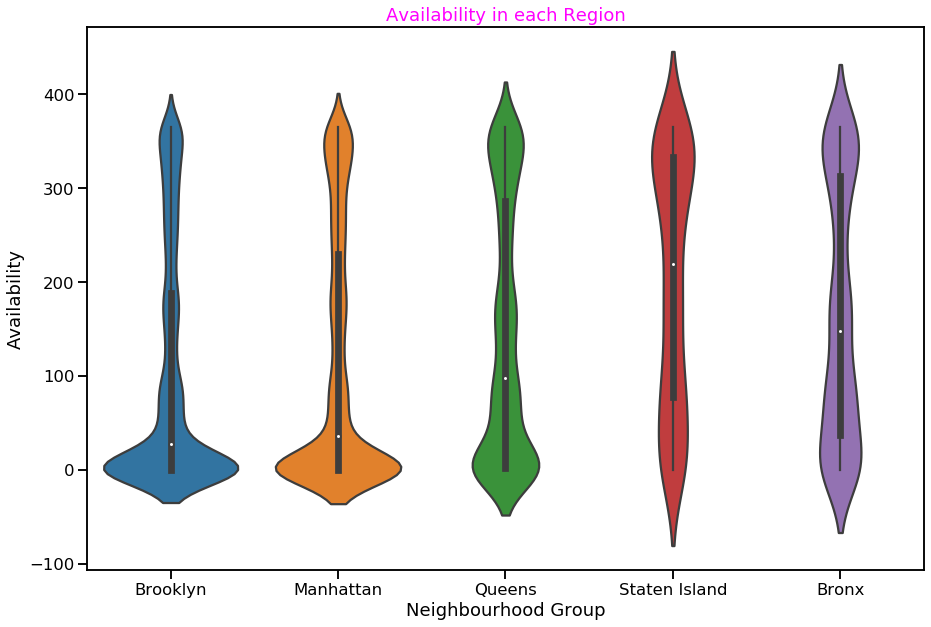

In [17]:
sns.set_context('talk')
sns.violinplot(df['neighbourhood_group'],df['availability_365'])
plt.xlabel("Neighbourhood Group")
plt.ylabel("Availability")
plt.title("Availability in each Region",color = 'magenta')

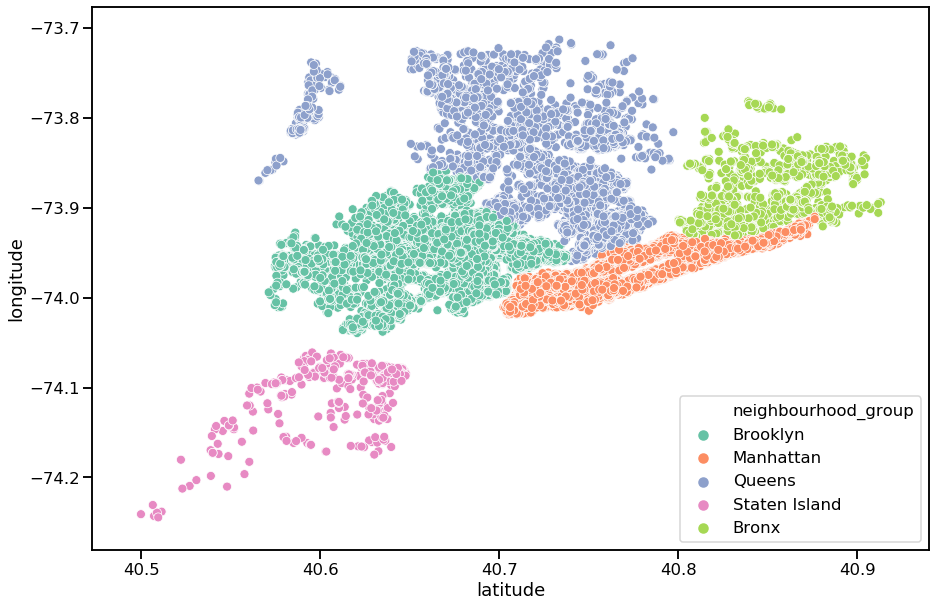

In [18]:
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['neighbourhood_group'],data=df,palette='Set2')

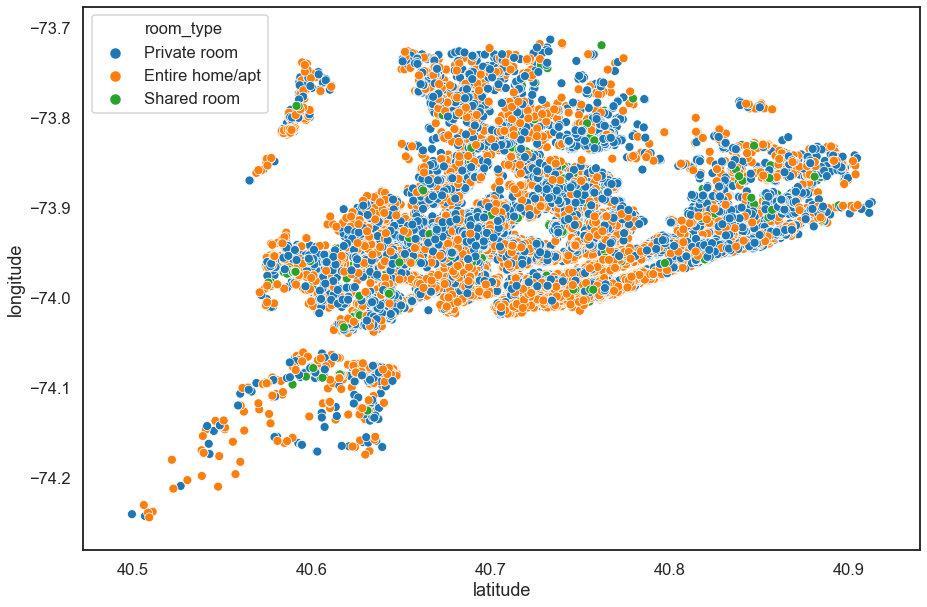

In [19]:
sns.set_style('white')
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['room_type'],data=df,sizes='size',
               markers="markers")

From the Plot, we can say that More people preferred to stay in a Private room in terms of Privacy while Shared room comes with the least preference.

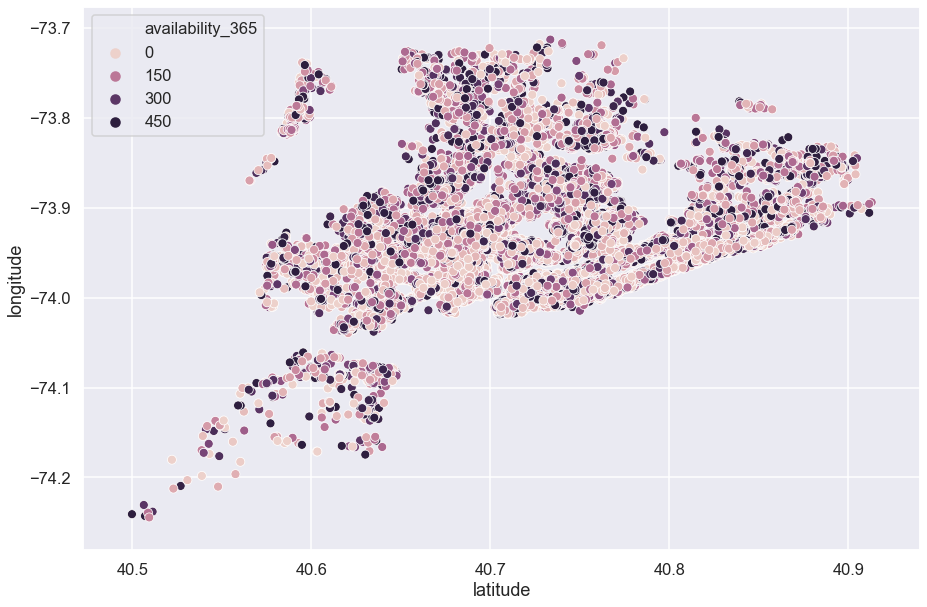

In [20]:
sns.set_style('darkgrid')
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['availability_365'],data=df,markers="markers")

In [21]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Now, we are dropping all unnecessary columns from the Dataset.

In [22]:
df = df.drop(['host_id','neighbourhood','calculated_host_listings_count'],axis=1)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0


We will change neighbourhood_group and room_type columns from categories to int by using LabelEncoder.

In [23]:
print(df['room_type'].unique())
print(df['neighbourhood_group'].unique())

['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [24]:
cols = ['neighbourhood_group','room_type']

from sklearn.preprocessing import LabelEncoder
end = LabelEncoder()
for col in cols:
    df[col] = end.fit_transform(df[col])
    mapping = dict(zip(end.classes_,end.transform(end.classes_)))
    print("column : ", col)
    print("Mapping is : ", mapping)
    
df.head()

column :  neighbourhood_group
Mapping is :  {'Bronx': 0, 'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4}
column :  room_type
Mapping is :  {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,1,40.64749,-73.97237,1,149,1,9,365
1,2,40.75362,-73.98377,0,225,1,45,355
2,2,40.80902,-73.94190,1,150,3,0,365
3,1,40.68514,-73.95976,0,89,1,270,194
4,2,40.79851,-73.94399,0,80,10,9,0


# Outliers Detection:-

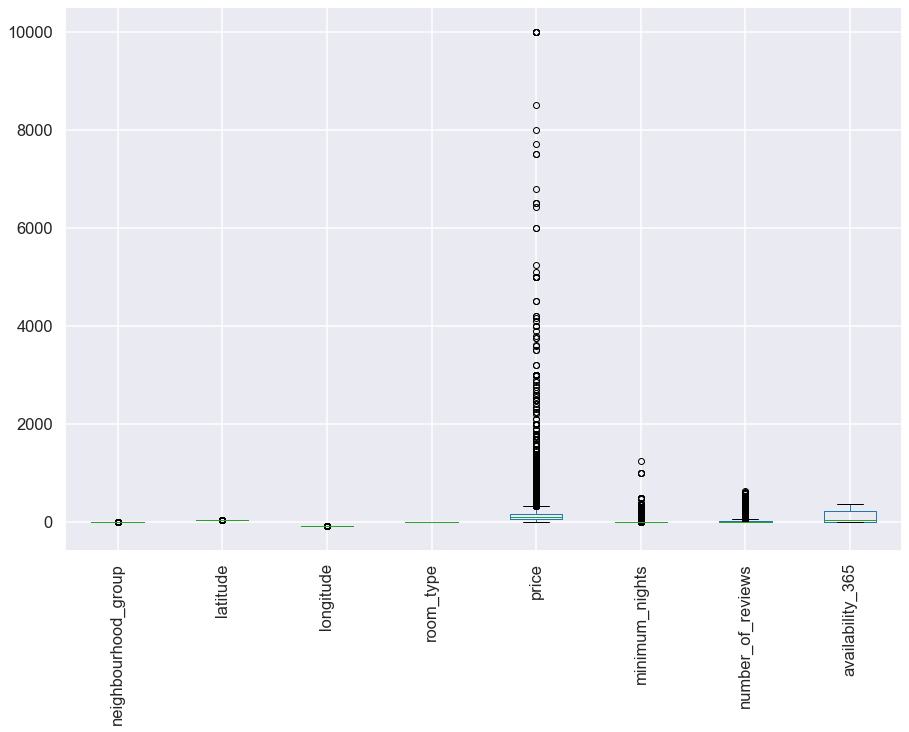

In [25]:
df.boxplot(rot=90)

In [26]:
print(df['latitude'].quantile(0.25))
print(df['latitude'].quantile(0.75))

40.6901
40.763115


In [27]:
print(df['longitude'].quantile(0.25))
print(df['longitude'].quantile(0.75))

-73.98307
-73.936275


In [28]:
print(df['minimum_nights'].quantile(0.25))
print(df['minimum_nights'].quantile(0.75))

1.0
5.0


In [29]:
print(df['number_of_reviews'].quantile(0.25))
print(df['number_of_reviews'].quantile(0.75))

1.0
24.0


In [30]:
print(df['price'].quantile(0.25))
print(df['price'].quantile(0.75))

69.0
175.0


In [31]:
df['latitude'] = np.where(df['latitude']<40.6901,40.6901,df['latitude'])
df['latitude'] = np.where(df['latitude']>40.763115,40.763115,df['latitude'])

df['longitude'] = np.where(df['longitude']<-73.98307,-73.98307,df['longitude'])
df['longitude'] = np.where(df['longitude']> -73.936275,-73.936275,df['longitude'])

df['minimum_nights'] = np.where(df['minimum_nights'] < 1.0,1.0,df['minimum_nights'])
df['minimum_nights'] = np.where(df['minimum_nights'] > 5.0,5.0,df['minimum_nights'])


df['number_of_reviews'] = np.where(df['number_of_reviews'] < 1.0 , 1.0 , df['number_of_reviews'])
df['number_of_reviews'] = np.where(df['number_of_reviews'] > 24.0 , 24.0 , df['number_of_reviews'])

df['price'] = np.where(df['price'] < 69.0 , 69.0 , df['price'])
df['price'] = np.where(df['price'] > 175.0 , 175.0 , df['price'])

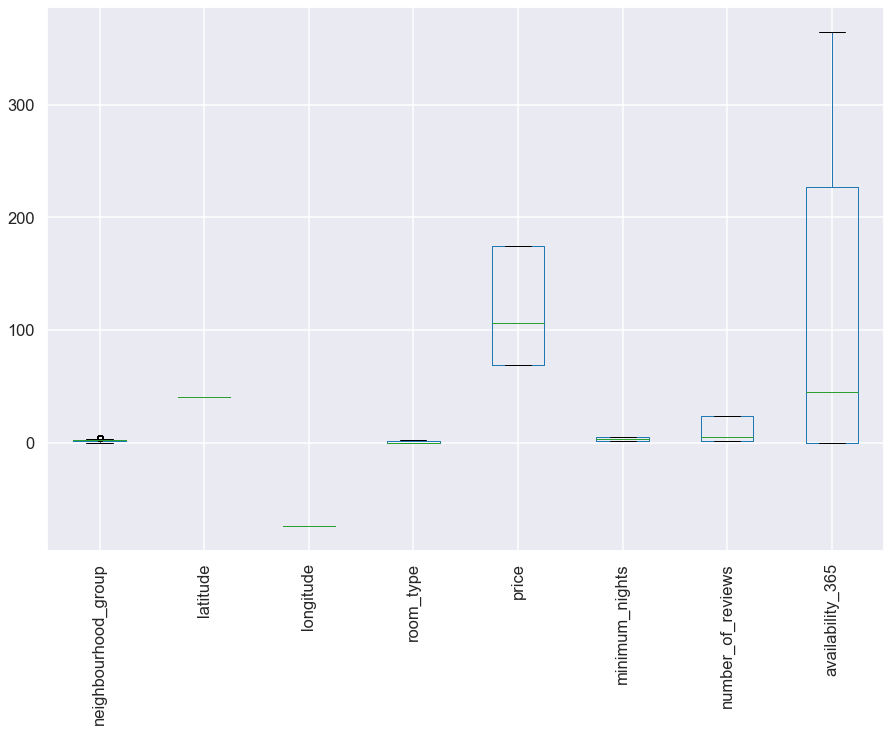

In [32]:
df.boxplot(rot=90)

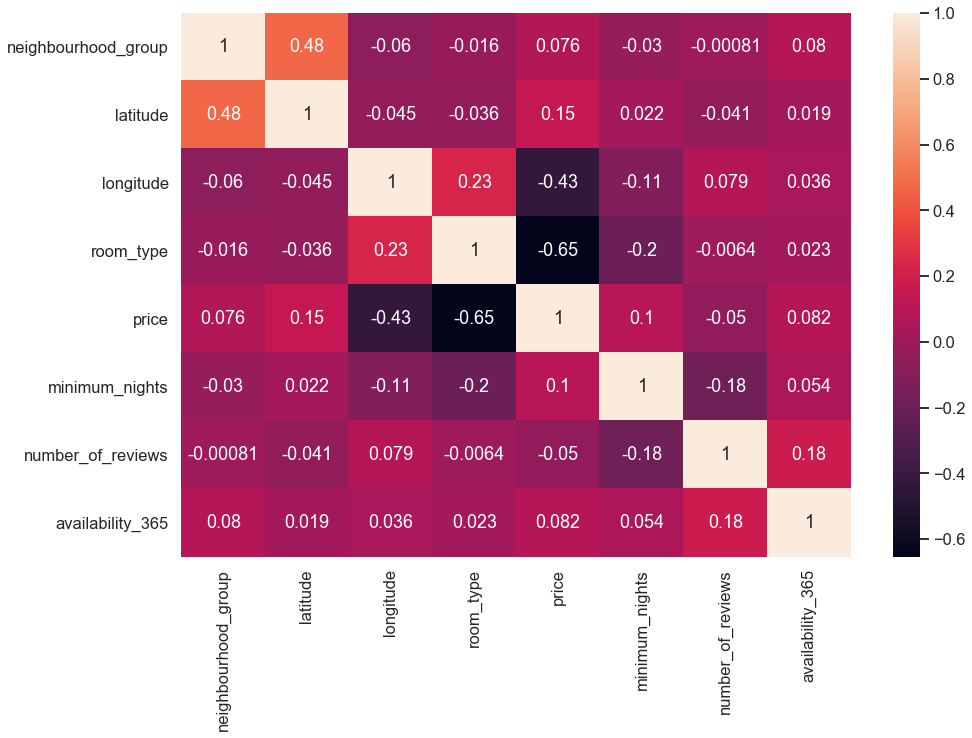

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
df.corr()['price'].sort_values(ascending=False)

price                  1.000000
latitude               0.154083
minimum_nights         0.101721
availability_365       0.081503
neighbourhood_group    0.076459
number_of_reviews     -0.049523
longitude             -0.432552
room_type             -0.652596
Name: price, dtype: float64

Looks like there is much correlated features with target variable.

# Important Features:-

In [35]:
X = df.drop('price',axis=1)
y = df['price']

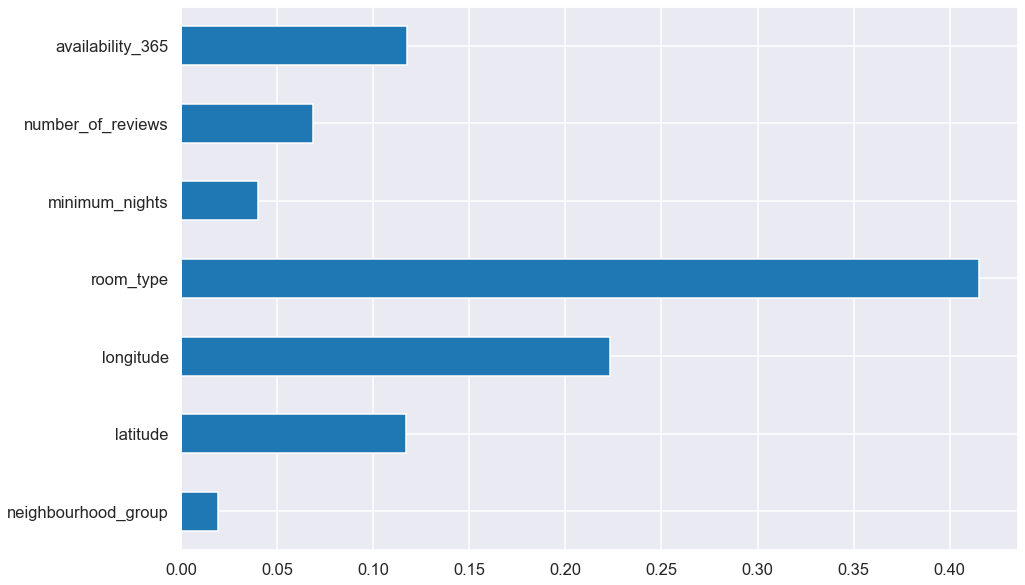

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
feature_model = ExtraTreesRegressor()
feature_model.fit(X,y)

feat_importances = pd.Series(feature_model.feature_importances_ , index = X.columns).plot(kind='barh')

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.91782758, -1.20448325, -0.72173442, ..., -1.19177656,
        -0.09211917,  1.91625031],
       [ 0.4412221 ,  0.93294448, -1.28560141, ..., -1.19177656,
         1.48060142,  1.84027456],
       [ 0.4412221 ,  1.2524482 ,  0.88396907, ...,  0.09869558,
        -0.93090349,  1.91625031],
       ...,
       [ 0.4412221 ,  1.2524482 ,  0.52720463, ...,  1.38916773,
        -0.93090349, -0.65173008],
       [ 0.4412221 ,  1.06384174, -1.28560141, ..., -1.19177656,
        -0.93090349, -0.84166946],
       [ 0.4412221 ,  1.2524482 , -1.28560141, ...,  1.38916773,
        -0.93090349, -0.68212038]])

# Split the Data into Train and Test:-

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 8)

# Model Building :-

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("LinearRegression")
print(35 * '-')
print("Train Score: ", (lr.score(X_train,y_train)*100))
pred_1 = lr.predict(X_test)
print("Test Score: ", r2_score(y_test,pred_1) * 100)

print('\n')
print(50*'-')
print("mean_absolute_error: ", mean_absolute_error(y_test,pred_1))
print("mean_squared_error: ", mean_squared_error(y_test,pred_1))
print("Root_mean_squared_error: ",mean_squared_error(y_test,pred_1,squared=False))

LinearRegression
-----------------------------------
Train Score:  54.141505525936836
Test Score:  53.88048742510452


--------------------------------------------------
mean_absolute_error:  23.405271329450375
mean_squared_error:  874.1270932309974
Root_mean_squared_error:  29.565640416385325


In [41]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("RandomForestRegressor")
print(35 * '-')
print("Train Score: ", (rf.score(X_train,y_train)*100))
pred_2 = rf.predict(X_test)
print("Test Score: ", r2_score(y_test,pred_2) * 100)

print('\n')
print(50*'-')
print("mean_absolute_error: ", mean_absolute_error(y_test,pred_2))
print("mean_squared_error: ", mean_squared_error(y_test,pred_2))
print("Root_mean_squared_error: ",mean_squared_error(y_test,pred_2,squared=False))

RandomForestRegressor
-----------------------------------
Train Score:  92.4036742135522
Test Score:  57.43251208511244


--------------------------------------------------
mean_absolute_error:  20.553752437134776
mean_squared_error:  806.8037236247959
Root_mean_squared_error:  28.404290584783066


In [42]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
print("GradientBoostingRegressor")
print(35 * '-')
print("Train Score: ", gbr.score(X_train,y_train)*100)
pred_3 = gbr.predict(X_test)
print("Test Score: ", r2_score(y_test,pred_3) *100)

print('\n')
print(50*'-')
print("mean_absolute_error: ", mean_absolute_error(y_test,pred_3))
print("mean_squared_error: ", mean_squared_error(y_test,pred_3))
print("Root_mean_squared_error: ",mean_squared_error(y_test,pred_3,squared=False))

GradientBoostingRegressor
-----------------------------------
Train Score:  60.84822534181102
Test Score:  60.3808398546585


--------------------------------------------------
mean_absolute_error:  20.798499973698274
mean_squared_error:  750.9225349652176
Root_mean_squared_error:  27.402965806007522


# Hypertunning GradientBoostingRegressor:-

In [43]:
# Number of trees in random forest
n_estimators = [600,800,900,1200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels
max_depth = [1,3,7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['friedman_mse', 'mse']}
print(random_grid)

{'n_estimators': [600, 800, 900, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 3, 7], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['friedman_mse', 'mse']}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=gbr,param_distributions=random_grid,cv=10,n_jobs=1,random_state=10)
random.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'max_depth': [1, 3, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [600, 800, 900, 1200]},
                   random_state=10)

In [45]:
random.best_params_

{'n_estimators': 800,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 3,
 'criterion': 'mse'}

In [46]:
ran_gbr = random.best_estimator_
ran_gbr

GradientBoostingRegressor(criterion='mse', max_features='log2',
                          min_samples_leaf=2, min_samples_split=14,
                          n_estimators=800)

In [47]:
print("Train Score: ",ran_gbr.score(X_train,y_train)*100)
pred_4 = ran_gbr.predict(X_test)
print("Test Score: ",r2_score(y_test,pred_4)*100)

Train Score:  62.99643604420427
Test Score:  61.099890738862285


In [48]:
import pickle
file = open("AB_NYC_Airbnb.pkl",'wb')
pickle.dump(ran_gbr,file)

In [49]:
model = open("AB_NYC_Airbnb.pkl","rb")
gradient=pickle.load(model)

In [50]:
pred = gradient.predict(X_test)
pred

array([169.61698925,  74.33784337, 121.64927759, ..., 162.74355794,
        72.43906755, 160.04531586])

In [51]:
r2_score(y_test,pred)*100

61.099890738862285

So,with the help of Hypertunning We got 61.09% Accuracy on Test Data.